## Import package

In [2]:
import sys
sys.path.append('/home/sun/ETGEMS-10.20/ET_OptME/script')
import ETGEMs_function_protain as etgf
from ETGEMs_function_protain import *
from ET_optme import *
import pandas as pd
import cobra
import gurobipy
import json
import multiprocessing
import os
from multiprocessing import Pool
from sympy import subsets
import pandas as pd
import matplotlib.pyplot as plt
import re

## setting path for models and data, example: C.glutamicum --->L_Lyscine

In [ ]:
model_file = "./data/lys.json"
model0_file = './task/iCW773_uniprot_modification_del.json'
reaction_kcat_MW_file = './data/reaction_change_by_enzuse_PDH_n.csv'
dictionarymodel_path = './result/dictionarymodel_icw.json'
reaction_g0_file=os.path.join('./task/iCW773_uniprot_modification_del_reaction_g0.csv')
metabolites_lnC_file = os.path.join('./task/metabolites_lnC_cg1.txt')
path_results = './result'
savepath = './result/picture'

In [ ]:
model.reactions.EX_hom__L_e

In [59]:
# model、substrate、product、oxygence
inputdic = {"model":'lys.json',
"substrate":"EX_glc_e_reverse",
"biomass": "CG_biomass_cgl_ATCC13032",
 "product": "EX_lys_L_e",
"taskname": "FSEOF",
"mode":"SET",
"oxygenstate":"aerobic"}
# save task.json
with open('/home/sun/ETGEMS-10.20/ET_OptME/data/task_fseof.json', 'w') as json_file:
    json.dump(inputdic, json_file, indent=4)
path_strain = 'iCW'

## invoke ET-FSEOF and run the task 

## 1.enzyme-thermo Model Construction

In [6]:
# Read the model
model = cobra.io.load_json_model(model_file)

# Load the model data into Get_Concretemodel_Need_Data
Concretemodel_Need_Data = Get_Concretemodel_Need_Data(model_file)

model0 = cobra.io.load_json_model(model0_file)

# Store the protein-centered model as a dictionary
dictionary_model = json_load(dictionarymodel_path)
dictionary_model.keys()
rname3 = []

# Store the protein-centered dictionary into Get_Concretemodel_Need_Data
get_dictionarymodel_data2(dictionary_model, Concretemodel_Need_Data, rname3)

# Load thermodynamic data into Get_Concretemodel_Need_Data
Get_Concretemodel_Need_Data_g0(Concretemodel_Need_Data, reaction_g0_file, metabolites_lnC_file, reaction_kcat_MW_file)

Concretemodel_Need_Data['reaction_g0']['g0'] = Concretemodel_Need_Data['reaction_g0']['g0'].replace(0, np.nan)
Concretemodel_Need_Data['reaction_g0'].dropna(subset=['g0'], inplace=True)

Concretemodel_Need_Data['reaction_g0'].at['AIRC3_reverse', 'g0'] = 0
Concretemodel_Need_Data['reaction_g0'].at['ATPS4rpp_reverse_num2', 'g0'] = 0

Inc = Concretemodel_Need_Data['metabolites_lnC']
for i in Concretemodel_Need_Data['metabolite_list']:
    if i not in Inc.index:
        Inc.loc[i, 'lnClb'] = -14.508658
        Inc.loc[i, 'lnCub'] = -3.912023

Concretemodel_Need_Data['metabolites_lnC'] = Inc

# Modify the model's oxygen conditions
if inputdic['oxygenstate'] == 'aerobic':
    model.reactions.get_by_id('EX_o2_e_reverse').upper_bound = 1000
if inputdic['oxygenstate'] == 'micro_aerobic': 
    model.reactions.get_by_id('EX_o2_e_reverse').upper_bound = 2 
if inputdic['oxygenstate'] == 'anaerobic': 
    model.reactions.get_by_id('EX_o2_e_reverse').upper_bound = 0


## 2.Algorithm :  ET-FSEOF

In [60]:
# Calculate the maximum production rate
product,objvalue2 = calculate_product_fseof(Concretemodel_Need_Data,inputdic,model)

3.1133333333333355


In [63]:
# Calculating the growth rate under the maximum production rate.
FSEOFdf,reactiondf = biomass(product,inputdic,Concretemodel_Need_Data,objvalue2,model,model0)

0.42872386022140374
0.42872386022140374
0.4287238602214051
0.11262431627631908
0.4139507194998477
0.3912038284231643
0.3912038284231643
0.3896240376106068
0.10537624124454939
0.37600217195232827
0.3547557975334458
0.3547557975334458
0.3516413527886898
0.09988445223886985
0.34338956406789195
0.3172357657352062
0.3172357657352062
0.31254153017789255
0.09501891756821382
0.31140669735144566
0.27665485152741537
0.27665485152741537
0.26936454098306195
0.08978087474617698
0.2671622422467829
0.232741296165147
0.232741296165147
0.22360199381606666
0.08460737149525731
0.21628053059343197
0.18882774080287898
0.18882774080287898
0.1778394466490717
0.08208369627578309
0.17155937098518118
0.14616885845096103
0.14616885845096103
0.1333844008297048
0.08023566792190913
0.12958637127024517
0.09051473234712097
0.09051473234712097
0.06970041409587022
0.07362417497880423
0.07150331490133308
0.02983761325728341
0.02983761325728341
0.006468468939087135
0.06682880535373899
0.010435930073818591


## Analyze the result and generate table and figure

In [64]:
columns = FSEOFdf.columns
sorted_columns = sorted(columns, key=lambda x: get_sort_key(x, FSEOFdf))
sorted_FSEOFdf = FSEOFdf[sorted_columns]


In [65]:
FSEOFdf = sorted_FSEOFdf[['gene'] + [col for col in sorted_columns if col != 'gene']]

In [52]:
FSEOFdf =detail(FSEOFdf)

In [49]:
FSEOFdf =result(FSEOFdf)

In [13]:
output_fseof(path_results,inputdic,reactiondf,FSEOFdf)

## Analysic results


## 1.Algorithm Advantage Case Analysis

In [ ]:
# Non-unique Reaction Direction
df_mdh = pd.read_excel('./result/ET_Optme/result/F_hom/results_S.xlsx') 

In [15]:
df_mdh

,Unnamed: 0,reaction,product = 0.0,product = 0.76,product = 1.51,product = 2.27,product = 3.02,product = 3.78,product = 4.54,product = 5.29,product = 6.05,product = 6.8,manipulation,gpr,direction,mean_flux,result,flux_mean
0,206,ATPS4rpp,29.936873,27.479689,25.054837,22.597654,20.172802,17.715619,15.258435,12.833583,10.417388,8.251613,down,cg1362 and cg1362 and cg1364 and cg1365 and cg...,0,27.479689,0.381982,19.094243
1,461,EX_h2o(e),20.515270,19.298782,18.098301,16.881813,15.681331,14.464843,13.248355,12.047873,10.840628,9.698565,NaN,NaN,0,19.298782,0.562696,15.106918
2,272,CYTBO3_4pp,18.618017,17.139455,15.680348,14.201786,12.742679,11.264117,9.785555,8.326448,6.888211,5.683984,down,cg2406 and cg2409 and cg2780,0,17.139455,0.406289,12.151001
3,658,NADH16pp,16.431547,15.230516,14.045287,12.844256,11.659027,10.457996,9.256964,8.071736,6.870284,5.682397,down,cg0326,0,15.230516,0.451228,11.056972
4,1169,GAPD,8.109358,7.934339,7.761623,7.586603,7.413887,7.238867,7.063848,6.891132,6.751086,6.799428,unchanged,cg1069 or cg1791,0,7.934339,0.858701,7.454393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,201,ASPTA,-0.869108,-1.526145,-2.174537,-2.831574,-3.479966,-4.137003,-4.794040,-5.442432,-6.098622,-6.741661,NaN,cg0294,1,-1.526145,4.000779,-3.805385
1201,444,EX_glc(e),-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,NaN,NaN,0,-5.000000,1.000000,-5.000000
1202,487,EX_nh4(e),-3.767905,-4.106872,-4.441378,-4.780345,-5.114851,-5.453818,-5.792785,-6.127291,-6.462586,-6.773885,NaN,NaN,1,-4.106872,1.572225,-5.270895
1203,493,EX_o2(e),-9.314964,-8.575030,-7.844831,-7.104897,-6.374698,-5.634764,-4.894830,-4.164631,-3.444853,-2.842058,NaN,NaN,1,-8.575030,0.406124,-6.078511


In [16]:
MDH = df_mdh[df_mdh['reaction'] == 'MDH']


In [45]:
MDH

,Unnamed: 0,reaction,product = 0.0,product = 0.76,product = 1.51,product = 2.27,product = 3.02,product = 3.78,product = 4.54,product = 5.29,product = 6.05,product = 6.8,manipulation,gpr,direction,mean_flux,result,flux_mean
42,1107,MDH,2.249648,1.965186,1.684466,1.400003,1.119283,0.834821,0.550358,0.269638,-0.130053,-1.139098,NaN,cg2613,0,1.965186,-0.169429,0.555275


In [17]:
# Convert DataFrame to a nested dictionary
result_dict = {}

for _, row in MDH.iterrows():
    # Extract the reaction ID and strip any whitespace
    reaction_id = row["reaction"].strip()
    
    # Retrieve the reaction equation using PySCeS
    reaction_equation = model.reactions.get_by_id(reaction_id).reaction
    
    # Create a dictionary for the reaction
    reaction_dict = {"reaction": reaction_equation}
    
    # Generate a list of 'x' values from 0 to the specified product value
    exlist = list(np.linspace(0, product, 10))
    exlist = [round(element, 3) for element in exlist]
    reaction_dict['x'] = exlist
    
    # Extract and round 'y' values from specified columns in the DataFrame
    y_values = [round(float(row[col]), 3) for col in MDH.columns[2:12]]
    reaction_dict['y'] = y_values
    
    # Add the reaction dictionary to the result dictionary
    result_dict[reaction_id] = reaction_dict


In [48]:
reaction

'mal__L_c + nad_c --> h_c + nadh_c + oaa_c'

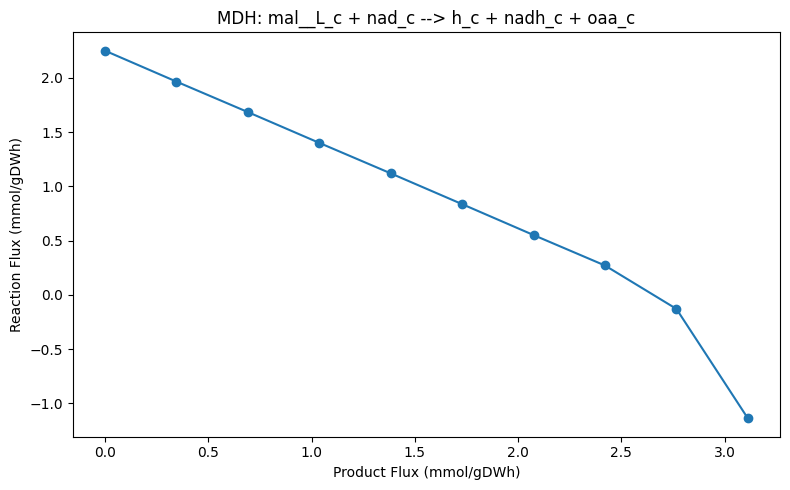

In [20]:


# Set the reaction ID to 'MDH'
id = 'MDH'
gludy_data = result_dict[id]

# Extract data from the nested dictionary
reaction = gludy_data['reaction']
x_values = gludy_data['x']
y_values = gludy_data['y']

# Plot the data
plt.figure(figsize=(8, 5))  # Set the figure size for better visibility
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('Product Flux (mmol/gDWh)')
plt.ylabel('Reaction Flux (mmol/gDWh)')
plt.title(f'{id}: {reaction}')  # Using f-string for cleaner formatting
plt.grid(False)  # Enable the grid for better readability
plt.tight_layout()  # Adjust layout to fit labels and title
plt.savefig(os.path.join(savepath, 'fseof_mdh.svg'))
plt.show()


In [ ]:
# Non-unique Reaction Direction
df_mdh_et = pd.read_excel('./result/ET_Optme/result/F_hom/results_SET.xlsx') 

In [22]:
MDH_et = df_mdh_et[df_mdh_et['gene'] == 'Cgl2380']


In [23]:
product = 6.36
# Extract data from the nested dictionary
result_dict = {}

for _, row in MDH_et.iterrows():
    reaction_id = row["gene"].strip()
    
    rt = model.genes.get_by_id('Cgl2380').reactions

    reaction_equation = list(rt)[2].reaction
    
    reaction_dict = {"reaction": reaction_equation}
    
    exlist = list(np.linspace(0,product,10))
    exlist = [round(element, 3) for element in exlist]
    reaction_dict['x'] = exlist
    y_values = [(row[col]) for col in MDH_et.columns[2:12]]
    reaction_dict['y'] = y_values
    
    result_dict[reaction_id] = reaction_dict

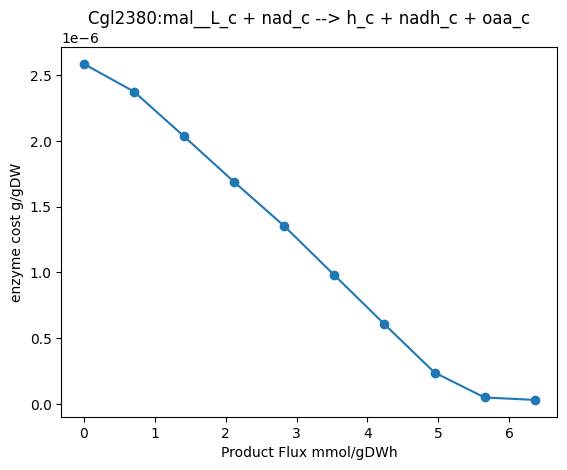

In [24]:

gludy_data = result_dict['Cgl2380']
reaction = gludy_data['reaction']
x_values = gludy_data['x']
y_values = gludy_data['y']

plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('Product Flux mmol/gDWh')
plt.ylabel('enzyme cost g/gDW')
plt.title('Cgl2380'+":"+reaction)
plt.grid(False)
plt.savefig(os.path.join(savepath, 'et_fseof_mdh.svg'))

In [ ]:
pfk_df=pd.read_excel('./result/ET_Optme/result/F_ile/results_S.xlsx')

In [26]:
pfk_df = pfk_df[pfk_df['reaction']=='PYRC']

In [27]:
pfk_df= pfk_df.drop('Unnamed: 0', axis=1)

In [28]:
product = 3.73

In [29]:
import numpy as np
result_dict = {}

for _, row in pfk_df.iterrows():
    reaction_id = row["reaction"].strip()

    reaction_equation = model.reactions.get_by_id(reaction_id).reaction
    
    reaction_dict = {"reaction": reaction_equation}
    
    
    exlist = list(np.linspace(0,product,10))
    exlist = [round(element, 3) for element in exlist]
    reaction_dict['x'] = exlist
    y_values = [round(float(row[col]),3) for col in pfk_df.columns[2:12]]
    reaction_dict['y'] = y_values
    
    result_dict[reaction_id] = reaction_dict

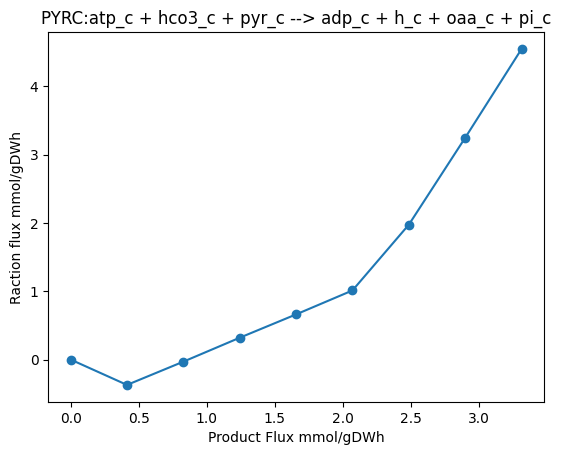

In [30]:

gludy_data = result_dict['PYRC']
reaction = gludy_data['reaction']
x_values = gludy_data['x']
y_values = gludy_data['y']

plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('Product Flux mmol/gDWh')
plt.ylabel('Raction flux mmol/gDWh')
plt.title('PYRC'+":"+reaction)
plt.grid(False)
plt.savefig(os.path.join(savepath, 'fseof_pyrc.svg'))
plt.show()

In [ ]:
epfk_df = pd.read_excel('./result/ET_Optme/result/F_ile/results_SET.xlsx')

In [32]:
epfk_df = epfk_df.drop('Unnamed: 0', axis=1)

In [33]:
epfk_df = epfk_df.drop('Unnamed: 0.1', axis=1)

In [34]:
epfk_df[epfk_df['gene']=='Cgl0689']

,gene,cond = 0.0,cond = 0.39,cond = 0.77,cond = 1.16,cond = 1.55,cond = 1.93,cond = 2.32,cond = 2.71,cond = 3.1,...,sum=0.39,sum=0.77,sum=1.16,sum=1.55,sum=1.93,sum=2.32,sum=2.71,sum=3.1,sum=3.48,mean_fluxs
123,Cgl0689,0.000058,0.00007,0.000081,0.000093,0.000105,0.000116,0.000128,0.00016,0.000225,...,1.452533,1.690991,1.935724,2.180458,2.418916,2.663649,3.329631,4.683673,6.002996,2.911521


In [35]:
import numpy as np

result_dict = {}

for _, row in epfk_df.iterrows():
    reaction_id = row["gene"].strip()
    
    rt = model.genes.get_by_id('Cgl0689').reactions

    reaction_equation = list(rt)[0].reaction
    reaction_dict = {"reaction": reaction_equation}
    
    
    exlist = list(np.linspace(0,product,10))
    exlist = [round(element, 3) for element in exlist]
    reaction_dict['x'] = exlist
    y_values = [(row[col]) for col in epfk_df.columns[1:11]]
    reaction_dict['y'] = y_values
    
    result_dict[reaction_id] = reaction_dict

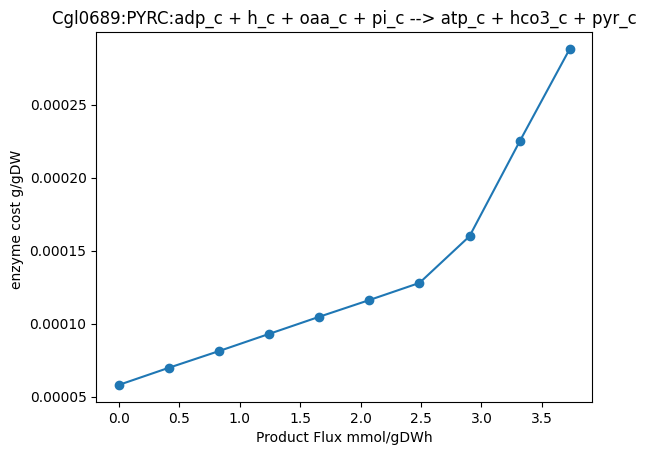

In [36]:

gludy_data = result_dict['Cgl0689']
reaction = gludy_data['reaction']
x_values = gludy_data['x']
y_values = gludy_data['y']

plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('Product Flux mmol/gDWh')
plt.ylabel('enzyme cost g/gDW ')
plt.title('Cgl0689:'+'PYRC'+":"+reaction)
plt.grid(False)
plt.savefig(os.path.join(savepath, 'et_fseof_pyrc.svg'))
plt.show()